## Housing Prices

In [106]:
import pandas as pd
import numpy as np
import scipy
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [13]:
data = pd.read_table('flats_moscow.txt')

In [38]:
data.head()

,n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,81,58,40,6.0,12.5,7,1,1,1,3
1,2,75,44,28,6.0,13.5,7,1,0,1,6
2,3,128,70,42,6.0,14.5,3,1,1,1,3
3,4,95,61,37,6.0,13.5,7,1,0,1,1
4,5,330,104,60,11.0,10.5,7,0,1,1,3


In [14]:
data.corr()

,n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
n,1.000000,-0.022761,-0.036063,-0.031432,-0.029838,0.029367,0.007293,-0.010263,-0.034944,0.016642,-0.020986
price,-0.022761,1.000000,0.756042,0.729614,0.597235,-0.331563,-0.152116,0.151996,0.260835,0.132564,-0.089623
totsp,-0.036063,0.756042,1.000000,0.862236,0.781536,-0.114698,-0.041426,0.011876,0.121287,0.113723,-0.021959
livesp,-0.031432,0.729614,0.862236,1.000000,0.573528,-0.197228,-0.052112,0.060367,0.254309,0.094658,-0.005480
kitsp,-0.029838,0.597235,0.781536,0.573528,1.000000,-0.061874,-0.028490,-0.009112,-0.019235,0.117050,-0.054632
dist,0.029367,-0.331563,-0.114698,-0.197228,-0.061874,1.000000,0.099185,-0.175277,-0.394742,0.020530,-0.191975
metrdist,0.007293,-0.152116,-0.041426,-0.052112,-0.028490,0.099185,1.000000,-0.040667,-0.066557,-0.021787,-0.001882
walk,-0.010263,0.151996,0.011876,0.060367,-0.009112,-0.175277,-0.040667,1.000000,0.153708,-0.021207,-0.035588
brick,-0.034944,0.260835,0.121287,0.254309,-0.019235,-0.394742,-0.066557,0.153708,1.000000,-0.051694,0.052712
floor,0.016642,0.132564,0.113723,0.094658,0.117050,0.020530,-0.021787,-0.021207,-0.051694,1.000000,-0.049948


In [153]:
f = data.corr().unstack().reset_index()
f= f[f[0] != 1]
correlated_features = f.sort_values(by=0,ascending=False)
correlated_features[correlated_features[0] > .3]

,level_0,level_1,0
35,livesp,totsp,0.862236
25,totsp,livesp,0.862236
46,kitsp,totsp,0.781536
26,totsp,kitsp,0.781536
23,totsp,price,0.756042
13,price,totsp,0.756042
34,livesp,price,0.729614
14,price,livesp,0.729614
15,price,kitsp,0.597235
45,kitsp,price,0.597235


In [124]:
correlated_features[correlated_features[0] < -.1]

,level_0,level_1,0
27,totsp,dist,-0.114698
57,dist,totsp,-0.114698
67,metrdist,price,-0.152116
17,price,metrdist,-0.152116
62,dist,walk,-0.175277
82,walk,dist,-0.175277
65,dist,code,-0.191975
115,code,dist,-0.191975
38,livesp,dist,-0.197228
58,dist,livesp,-0.197228


price


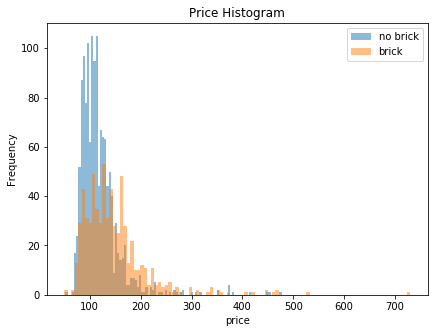

In [146]:
title = 'price'
print title
plt.figure(i+1,figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('Price Histogram')
a = data[title][data['brick'] == 1]
b = data[title][data['brick'] == 0]
# c = data[title][data['class'] == 3]
b.plot.hist(alpha=.5, bins=100, label='no brick')
plt.xlabel('price')
a.plot.hist(alpha=.5, bins=100, label='brick')
plt.legend()
# c.plot.hist(alpha=.5)

price


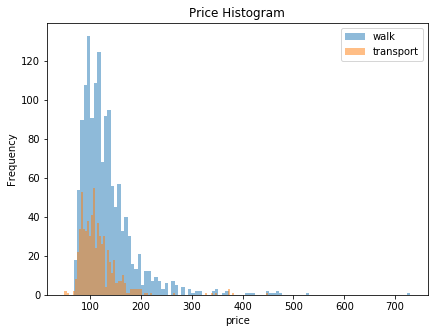

In [151]:
title = 'price'
print title
plt.figure(i+1,figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('Price Histogram')
a = data[title][data['walk'] == 1]
b = data[title][data['walk'] == 0]
# c = data[title][data['class'] == 3]
a.plot.hist(alpha=.5, bins=100, label='walk')

b.plot.hist(alpha=.5, bins=100, label='transport')
plt.xlabel('price')
plt.legend()
# c.plot.hist(alpha=.5)

price


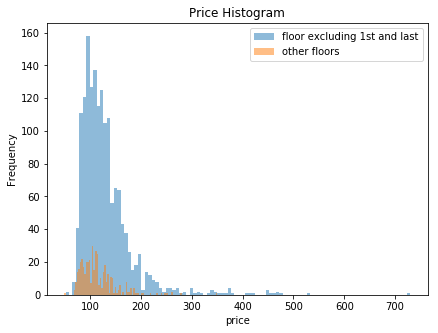

In [152]:
title = 'price'
print title
plt.figure(i+1,figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('Price Histogram')
a = data[title][data['floor'] == 1]
b = data[title][data['floor'] == 0]
# c = data[title][data['class'] == 3]
a.plot.hist(alpha=.5, bins=100, label='floor excluding 1st and last')

b.plot.hist(alpha=.5, bins=100, label='other floors')
plt.xlabel('price')
plt.legend()
# c.plot.hist(alpha=.5)

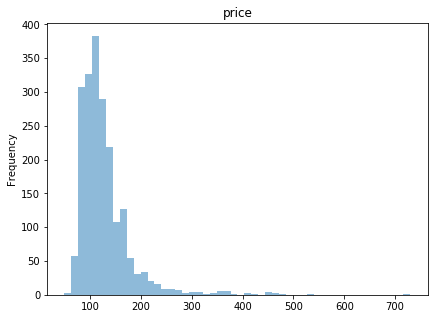

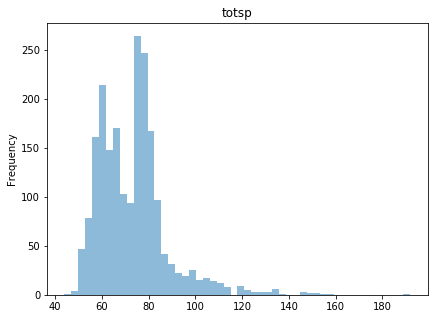

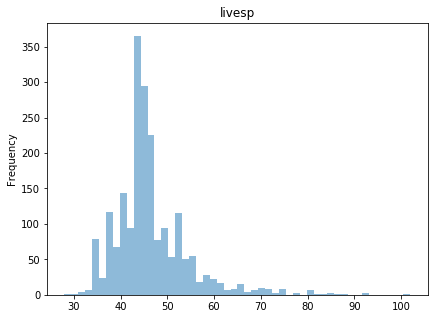

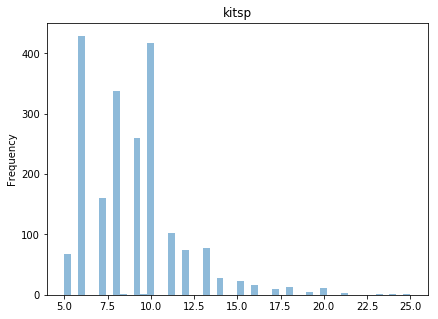

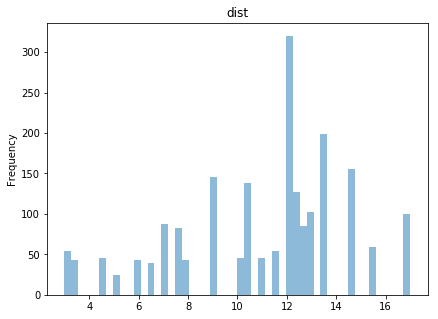

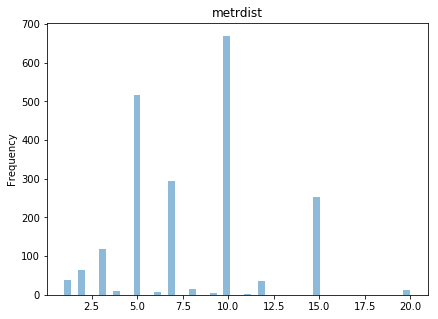

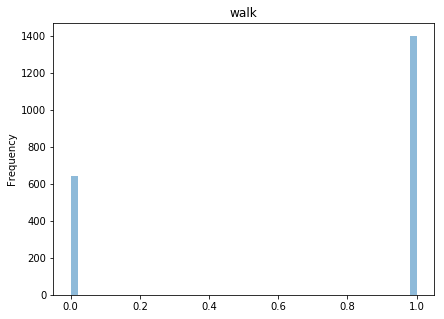

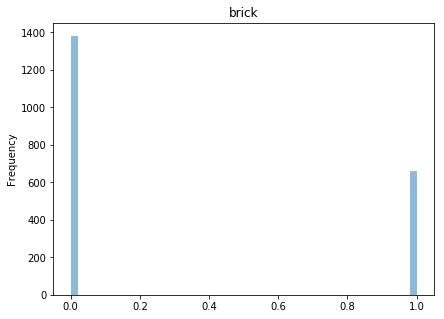

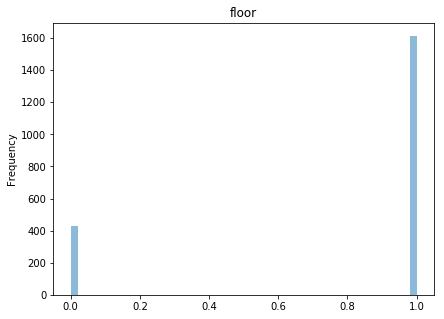

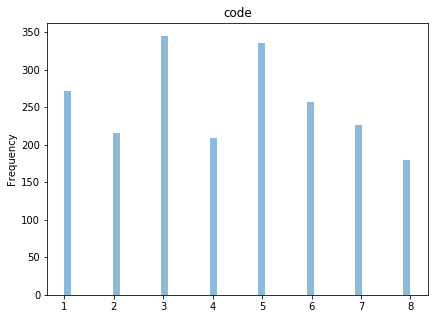

In [154]:
import pdb
for i, title in enumerate(data.columns[1::]):
#     print title
    plt.figure(i+1,figsize=(15,5))
    plt.subplot(1, 2, 1)
    plt.title(title)
#     a = data[title][data['class'] == 1]
#     b = data[title][data['class'] == 2]
#     c = data[title][data['class'] == 3]
    data[title].plot.hist(bins=50,alpha=.5)
#     b.plot.hist(alpha=.5)
#     c.plot.hist(alpha=.5)

In [8]:
data.head()

,n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,81,58,40,6.0,12.5,7,1,1,1,3
1,2,75,44,28,6.0,13.5,7,1,0,1,6
2,3,128,70,42,6.0,14.5,3,1,1,1,3
3,4,95,61,37,6.0,13.5,7,1,0,1,1
4,5,330,104,60,11.0,10.5,7,0,1,1,3


In [39]:
n_data = pd.concat([data.drop(["n", 'code','price'],1), pd.get_dummies(data['code'])], 1) 

In [131]:
n_data['log_totsp'] = np.log(n_data['totsp'] )
n_data['log_livesp'] = np.log(n_data['livesp'] )
n_data['log_kitsp'] = np.log(n_data['kitsp'] )
n_data['log_dist'] = np.log(n_data['dist'] )
n_data['spc'] = n_data['totsp']-n_data['kitsp']-n_data['livesp'] 

In [132]:
n_data.head()

,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,1,2,...,4,5,6,7,8,log_totsp,log_livesp,log_kitsp,log_dist,spc
0,58,40,6.0,12.5,7,1,1,1,0,0,...,0,0,0,0,0,4.060443,3.688879,1.791759,2.525729,12.0
1,44,28,6.0,13.5,7,1,0,1,0,0,...,0,0,1,0,0,3.784190,3.332205,1.791759,2.602690,10.0
2,70,42,6.0,14.5,3,1,1,1,0,0,...,0,0,0,0,0,4.248495,3.737670,1.791759,2.674149,22.0
3,61,37,6.0,13.5,7,1,0,1,1,0,...,0,0,0,0,0,4.110874,3.610918,1.791759,2.602690,18.0
4,104,60,11.0,10.5,7,0,1,1,0,0,...,0,0,0,0,0,4.644391,4.094345,2.397895,2.351375,33.0


In [133]:
y = data["price"]
X = n_data

In [134]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

from sklearn.linear_model import ElasticNet
from sklearn import grid_search

parameters = {'alpha':[1,.1,0.1],'l1_ratio':[0,.2,.5,.8,1]} 
#The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. 
#For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. 
#For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.

elNet = ElasticNet(random_state=1)
regressor = grid_search.GridSearchCV(elNet, parameters)
regressor.fit(X,y)

print regressor.best_estimator_

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=1, selection='cyclic', tol=0.0001, warm_start=False)


In [135]:
lasso_y = regressor.predict(X_test)
print mean_squared_error(y_test, lasso_y)
print("R Squared %.4f" % r2_score(np.array(y_test), lasso_y))


908.929017562
R Squared 0.7325


In [136]:

# http://xgboost.readthedocs.io/en/latest/model.html
import xgboost as xgb
label = np.array(y_train)
train_data = np.array(X_train)
test_data = np.array(X_test)
dtrain = xgb.DMatrix(train_data,label=label)
dtest = xgb.DMatrix(test_data)
param = {
        'eta':0.1,  #step shrinkage size
        'silent':0,  #verbose
        'booster' :  'gbtree', # choose the booster, can be gbtree or gblinear
        'gamma' : .1, # minimum loss reduction required to make a further partition
        'objective':'reg:linear',  #
        'min_child_weight': 3,
        'eval_metric':['logloss','rmse'], #evaluate with logloss for multiclass
#         'min_child_weight' : 10, # minimum sum of instance weight(hessian) needed in a child
        'max_depth' : 1, # maximum depth of a tree
        'nthread':4, #use 4 threads        
        } 
#consider playing with gamma in the above parameters

num_round = 1000
watchlist  = [(dtrain,'train')]
bst = xgb.train(param, dtrain, num_round, watchlist)

[0]	train-logloss:-4640.05	train-rmse:123.741
[1]	train-logloss:-4640.05	train-rmse:112.794
[2]	train-logloss:-4640.05	train-rmse:103.049
[3]	train-logloss:-4640.05	train-rmse:94.3367
[4]	train-logloss:-4640.05	train-rmse:86.5786
[5]	train-logloss:-4640.05	train-rmse:79.7108
[6]	train-logloss:-4640.05	train-rmse:73.6056
[7]	train-logloss:-4640.05	train-rmse:68.1963
[8]	train-logloss:-4640.05	train-rmse:63.4132
[9]	train-logloss:-4640.05	train-rmse:59.2252
[10]	train-logloss:-4640.05	train-rmse:55.5303
[11]	train-logloss:-4640.05	train-rmse:52.2794
[12]	train-logloss:-4640.05	train-rmse:49.4192
[13]	train-logloss:-4640.05	train-rmse:46.9176
[14]	train-logloss:-4640.05	train-rmse:44.7323
[15]	train-logloss:-4640.05	train-rmse:42.8214
[16]	train-logloss:-4640.05	train-rmse:41.1331
[17]	train-logloss:-4640.05	train-rmse:39.6609
[18]	train-logloss:-4640.05	train-rmse:38.3912
[19]	train-logloss:-4640.05	train-rmse:37.2647
[20]	train-logloss:-4640.05	train-rmse:36.2665
[21]	train-logloss:-464

[174]	train-logloss:-4640.05	train-rmse:24.1358
[175]	train-logloss:-4640.05	train-rmse:24.1279
[176]	train-logloss:-4640.05	train-rmse:24.1198
[177]	train-logloss:-4640.05	train-rmse:24.1118
[178]	train-logloss:-4640.05	train-rmse:24.1041
[179]	train-logloss:-4640.05	train-rmse:24.0964
[180]	train-logloss:-4640.05	train-rmse:24.089
[181]	train-logloss:-4640.05	train-rmse:24.0816
[182]	train-logloss:-4640.05	train-rmse:24.0743
[183]	train-logloss:-4640.05	train-rmse:24.0669
[184]	train-logloss:-4640.05	train-rmse:24.0589
[185]	train-logloss:-4640.05	train-rmse:24.0516
[186]	train-logloss:-4640.05	train-rmse:24.0444
[187]	train-logloss:-4640.05	train-rmse:24.0371
[188]	train-logloss:-4640.05	train-rmse:24.03
[189]	train-logloss:-4640.05	train-rmse:24.0229
[190]	train-logloss:-4640.05	train-rmse:24.0156
[191]	train-logloss:-4640.05	train-rmse:24.0085
[192]	train-logloss:-4640.05	train-rmse:24.0016
[193]	train-logloss:-4640.05	train-rmse:23.9942
[194]	train-logloss:-4640.05	train-rmse:23.

[346]	train-logloss:-4640.05	train-rmse:23.2443
[347]	train-logloss:-4640.05	train-rmse:23.2405
[348]	train-logloss:-4640.05	train-rmse:23.237
[349]	train-logloss:-4640.05	train-rmse:23.2334
[350]	train-logloss:-4640.05	train-rmse:23.2299
[351]	train-logloss:-4640.05	train-rmse:23.2262
[352]	train-logloss:-4640.05	train-rmse:23.2227
[353]	train-logloss:-4640.05	train-rmse:23.219
[354]	train-logloss:-4640.05	train-rmse:23.2155
[355]	train-logloss:-4640.05	train-rmse:23.2117
[356]	train-logloss:-4640.05	train-rmse:23.2082
[357]	train-logloss:-4640.05	train-rmse:23.2045
[358]	train-logloss:-4640.05	train-rmse:23.2011
[359]	train-logloss:-4640.05	train-rmse:23.1976
[360]	train-logloss:-4640.05	train-rmse:23.194
[361]	train-logloss:-4640.05	train-rmse:23.1904
[362]	train-logloss:-4640.05	train-rmse:23.187
[363]	train-logloss:-4640.05	train-rmse:23.1836
[364]	train-logloss:-4640.05	train-rmse:23.1801
[365]	train-logloss:-4640.05	train-rmse:23.1767
[366]	train-logloss:-4640.05	train-rmse:23.1

[518]	train-logloss:-4640.05	train-rmse:22.7403
[519]	train-logloss:-4640.05	train-rmse:22.738
[520]	train-logloss:-4640.05	train-rmse:22.7356
[521]	train-logloss:-4640.05	train-rmse:22.7333
[522]	train-logloss:-4640.05	train-rmse:22.731
[523]	train-logloss:-4640.05	train-rmse:22.7284
[524]	train-logloss:-4640.05	train-rmse:22.7261
[525]	train-logloss:-4640.05	train-rmse:22.7237
[526]	train-logloss:-4640.05	train-rmse:22.7214
[527]	train-logloss:-4640.05	train-rmse:22.719
[528]	train-logloss:-4640.05	train-rmse:22.7167
[529]	train-logloss:-4640.05	train-rmse:22.7143
[530]	train-logloss:-4640.05	train-rmse:22.712
[531]	train-logloss:-4640.05	train-rmse:22.7098
[532]	train-logloss:-4640.05	train-rmse:22.7073
[533]	train-logloss:-4640.05	train-rmse:22.7051
[534]	train-logloss:-4640.05	train-rmse:22.7027
[535]	train-logloss:-4640.05	train-rmse:22.7005
[536]	train-logloss:-4640.05	train-rmse:22.6982
[537]	train-logloss:-4640.05	train-rmse:22.6959
[538]	train-logloss:-4640.05	train-rmse:22.6

[690]	train-logloss:-4640.05	train-rmse:22.3877
[691]	train-logloss:-4640.05	train-rmse:22.3857
[692]	train-logloss:-4640.05	train-rmse:22.384
[693]	train-logloss:-4640.05	train-rmse:22.3821
[694]	train-logloss:-4640.05	train-rmse:22.3803
[695]	train-logloss:-4640.05	train-rmse:22.3784
[696]	train-logloss:-4640.05	train-rmse:22.3767
[697]	train-logloss:-4640.05	train-rmse:22.3749
[698]	train-logloss:-4640.05	train-rmse:22.3731
[699]	train-logloss:-4640.05	train-rmse:22.3713
[700]	train-logloss:-4640.05	train-rmse:22.3695
[701]	train-logloss:-4640.05	train-rmse:22.3677
[702]	train-logloss:-4640.05	train-rmse:22.3658
[703]	train-logloss:-4640.05	train-rmse:22.364
[704]	train-logloss:-4640.05	train-rmse:22.3622
[705]	train-logloss:-4640.05	train-rmse:22.3604
[706]	train-logloss:-4640.05	train-rmse:22.3587
[707]	train-logloss:-4640.05	train-rmse:22.3569
[708]	train-logloss:-4640.05	train-rmse:22.3551
[709]	train-logloss:-4640.05	train-rmse:22.3533
[710]	train-logloss:-4640.05	train-rmse:22

[862]	train-logloss:-4640.05	train-rmse:22.1073
[863]	train-logloss:-4640.05	train-rmse:22.1058
[864]	train-logloss:-4640.05	train-rmse:22.1044
[865]	train-logloss:-4640.05	train-rmse:22.1029
[866]	train-logloss:-4640.05	train-rmse:22.1014
[867]	train-logloss:-4640.05	train-rmse:22.0999
[868]	train-logloss:-4640.05	train-rmse:22.0984
[869]	train-logloss:-4640.05	train-rmse:22.097
[870]	train-logloss:-4640.05	train-rmse:22.0955
[871]	train-logloss:-4640.05	train-rmse:22.0941
[872]	train-logloss:-4640.05	train-rmse:22.0926
[873]	train-logloss:-4640.05	train-rmse:22.0911
[874]	train-logloss:-4640.05	train-rmse:22.0897
[875]	train-logloss:-4640.05	train-rmse:22.0883
[876]	train-logloss:-4640.05	train-rmse:22.0868
[877]	train-logloss:-4640.05	train-rmse:22.0854
[878]	train-logloss:-4640.05	train-rmse:22.0839
[879]	train-logloss:-4640.05	train-rmse:22.0825
[880]	train-logloss:-4640.05	train-rmse:22.081
[881]	train-logloss:-4640.05	train-rmse:22.0796
[882]	train-logloss:-4640.05	train-rmse:22

In [137]:
y_predict = bst.predict(dtest)
mse = mean_squared_error(np.array(y_test), y_predict)
print("MSE: %.4f" % mse)
print("R Squared %.4f" % r2_score(np.array(y_test), y_predict))

MSE: 859.9280
R Squared 0.7469


http://rstudio-pubs-static.s3.amazonaws.com/4474_d56b25bc34714a5b9d778a6e791b3ff2.html
    https://alveronika.files.wordpress.com/2016/01/laboratory-assignment-6.pdf

In [ ]:
heteroskdasticity